# Introduction to SckitLearn

## Workflow

0. Import standard libraries
1. Getting Data ready
2. Choosing a estimator/model
3. Make predictions
4. Evaluate the model
5. Experiment and improve
6. Save and reload trained model

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting data ready
 
- Split data into features and labels
- Filling or dropping missing values
- Connvert non-numerical values into numerical values

In [2]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Splitting Data into train & test sets

Split our data into two sets each to:
- train our model
- test our model

Here we will split the data as **train : test = 0.8 : 0.2**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# view the split ratio
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Conversion of non-numeriacals to numericals

In [7]:
# example of conversion of non-numericals to numericals with car-sales
car_sales = pd.read_csv("data/car-sales-extended.csv")

In [8]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
# split data into features and labels
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [10]:
# convert categorical features to  numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",
                                  one_hot,
                                  categories)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [11]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [12]:
# let's try to predict the prices
## split train and test data
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.3)

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [14]:
model.score(X_test,y_test)

0.3094997236279867

### Fill/Drop Missing Values

- Option \#1 (Use Pandas)
- Option \#2 (Use Sklearn)

**NOTE:** Don't keep test and train sets together while fill missing values

In [15]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [16]:
# view amount of missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
# drop records with missing 'price' values
car_sales_missing.dropna(subset=["Price"],axis=0,inplace=True)

In [18]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [19]:
# split data
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

#### OPTION \#1

In [20]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [21]:
# fill missing values
## Option #1
X_train["Make"].fillna("missing",inplace=True)
X_train["Colour"].fillna("missing",inplace=True)
X_train["Doors"].fillna(4,inplace=True)
X_train["Odometer (KM)"].fillna(X_train["Odometer (KM)"].mean(),inplace=True)

X_test["Make"].fillna("missing",inplace=True)
X_test["Colour"].fillna("missing",inplace=True)
X_test["Doors"].fillna(4,inplace=True)
X_test["Odometer (KM)"].fillna(X_test["Odometer (KM)"].mean(),inplace=True)

C:\Users\Arun\Documents\python-DS\env\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
filled_X_train = pd.DataFrame(X_train, columns=["Make","Colour","Odometer (KM)","Doors"])
filled_X_test = pd.DataFrame(X_test, columns=["Make","Colour","Odometer (KM)","Doors"])

#### OPTION \#2

In [23]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [24]:
## Option #2 (filling=imputation)
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat-imputer",cat_imputer,cat_features),
                            ("door-imputer",door_imputer,door_features),
                            ("num-imputer",num_imputer,num_features)],
                           remainder="passthrough")

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

In [25]:
filled_X_train = pd.DataFrame(X_train, columns=["Make","Colour","Odometer (KM)","Doors"])
filled_X_test = pd.DataFrame(X_test, columns=["Make","Colour","Odometer (KM)","Doors"])

Now, convert non-numericals to numericals and we can use any ML model on the train and test sets

## Choosing a estimator/model

<img src="images/sklearn-ml-map.png">

**Tip:**

- Use emsemble methods for structured data
- Use deep learning or transfer learning for unstructured data

## Make predictions

### Classification

In [26]:
## Get our model ready

# Import data
heart_disease = pd.read_csv("data/heart-disease.csv")

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# chooose model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# fit our model
clf.fit(X_train, y_train)

# test
clf.score(X_test, y_test)

0.8524590163934426

In [27]:
# predictions
y_preds = clf.predict(X_test)

In [28]:
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
# Compare predictions with truth values
np.mean(y_preds == y_test)

0.8524590163934426

In [30]:
# evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8524590163934426

In [31]:
# pedicting probs
clf.predict_proba(X_test[:5])

array([[0.79, 0.21],
       [0.49, 0.51],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.83, 0.17]])

In [32]:
y_test[:5]

225    0
152    1
228    0
201    0
52     1
Name: target, dtype: int64

### Regression

In [33]:
# get data ready
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

# Split data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# choose model
regr = RandomForestRegressor()

# fit model to data
regr.fit(X_train, y_train)

# test
regr.score(X_test, y_test)

0.8928231556288578

In [34]:
# predict
y_preds = regr.predict(X_test)

In [35]:
# evaluate
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

2.0165490196078433

## Evaluating our model

- Estimator `score` method
- The `scoring` parameter
- Problem-Specific metric functions

### Estimator `score` method

In [36]:
## Classification

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# chooose model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# fit our model
clf.fit(X_train, y_train)

# test
clf.score(X_test, y_test)

0.8524590163934426

In [37]:
## Regression

# Split data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# choose model
regr = RandomForestRegressor()

# fit model to data
regr.fit(X_train, y_train)

# test
regr.score(X_test, y_test)

0.8928231556288578

### Classification model evaluation metrics

- Accuracy score
- ROC curve
- Confusion matrix
- Classification report

### K-Fold Cross-Validation-Scoring

In [38]:
## Classification

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# chooose model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# fit our model
clf.fit(X_train, y_train)

# score
clf.score(X_test,y_test)

0.8524590163934426

In [39]:
# score method vs cross-validation
from sklearn.model_selection import cross_val_score
np.random.seed(0)

simple_score = clf.score(X_test, y_test)
cross_val = np.mean(cross_val_score(clf, X, y, cv=10, scoring=None))

simple_score, cross_val

(0.8524590163934426, 0.8347311827956989)

Scoring parameter set to `None` by default. Instead default scoring methods(`score` function) will be used for cross-validation

### Accuracy Score

In [40]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 83.47%


### Area under receiver operating characteristics curve (AUC/ROC)

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

In [41]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.86, 0.14],
        [0.45, 0.55],
        [0.42, 0.58],
        [0.99, 0.01],
        [0.82, 0.18],
        [0.45, 0.55],
        [0.79, 0.21],
        [0.91, 0.09],
        [0.96, 0.04],
        [0.91, 0.09]]),
 61)

In [42]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.14, 0.55, 0.58, 0.01, 0.18, 0.55, 0.21, 0.09, 0.04, 0.09])

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07407407,
       0.07407407, 0.14814815, 0.14814815, 0.25925926, 0.25925926,
       0.48148148, 0.48148148, 0.51851852, 0.59259259, 0.7037037 ,
       0.74074074, 0.81481481, 1.        ])

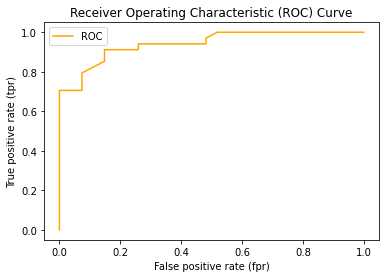

In [44]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9417211328976035

### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 5, 29]], dtype=int64)

In [47]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,5,29


In [48]:
# How install a conda package into the current envrionment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

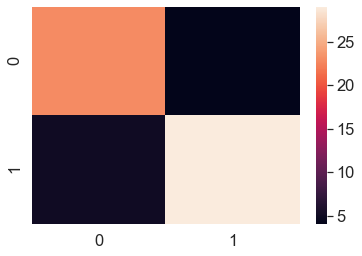

In [49]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

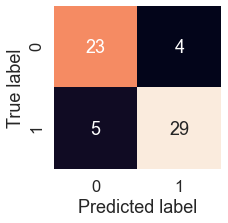

In [50]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
#     Fix the broken annotations (this happened in Matplotlib 3.1.1)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top-0.5);
    
plot_conf_mat(conf_mat)

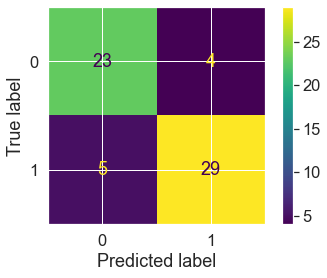

In [51]:
# PLotting confusion matrix with sklearn
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

### R^2/Coefficient of Determination

In [53]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [54]:
model.score(X_test, y_test)

0.8654448653350507

### Mean absolue error (MAE)

In [55]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

### Mean squared error (MSE)

In [56]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

- Pay more attention to MAE: When being 10,000 off is twice as bad as being 5,000 off.
- Pay more attention to MSE: When being 10,000 off is more than twice as bad as being 5,000 off.

## Scoring Parameter

### Classification Model

In [57]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [58]:
np.random.seed(0)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [59]:
np.random.seed(0)
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.82


### Regression Model

In [60]:
np.random.seed(0)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [61]:
np.random.seed(0)
cv_mae = cross_val_score(model,
                         X,
                         y,
                         cv=5,
                         scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -2.99


The above mesuring is in neg because all evaluation metrics in scikit learn follows **higher return values are better than lower return values**

In [62]:
np.random.seed(0)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -21.34


## Using different evaluation metrics with Scikit-Learn

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(0)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.86
Recall: 0.88
F1: 0.87


In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(0)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.76
MAE: 2.66
MSE: 19.75


## Improving model predictions through experimentation (hyperparameter tuning)

The prdeictions can be improved in 2 ways:
- Collect more Data
- Try a new estimator/Improve the estimator

When in comes to improving the performance of the estimator, it can be done by tuning some of its settings(hyperparameters).

In [65]:
# Get a model's hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These hyperparameters can be tuned by 3 methods:
- By Hand
- Using RandomSearchCV
- Using GridSearchCV

### Tune by hand

Before proceeding let's create a funtion to evaluate the models

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [ ]:
# Shuffle the data
heart_disease = heart_disease.sample(frac=1)

In [137]:
np.random.seed(0)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Create a base model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 91.11%
Precision: 0.91
Recall: 0.91
F1 score: 0.91


{'accuracy': 0.91, 'precision': 0.91, 'recall': 0.91, 'f1': 0.91}

In [138]:
np.random.seed(0)
# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 93.33%
Precision: 0.95
Recall: 0.91
F1 score: 0.93


### Tune with RandomSearchCV

**RandomizedSearchCV** allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

In [122]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [4, 6],
        "min_samples_leaf": [2, 4]}

In [139]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(0)

# Split into X & y
# X = heart_disease.drop("target", axis=1)
# y = heart_disease["target"]

# Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; tota

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_featur

In [140]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [141]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 82.61%
Precision: 0.80
Recall: 0.87
F1 score: 0.83


### Tune with GridSearchCV

The main difference between GridSearchCV and RandomizedSearchCV is **GridSearchCV searches across a grid of hyperparamters exhaustively**, where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

In [136]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [10,20,50,100],
          'max_depth': [5, 10, 15, 20],
          'max_features': ['sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [142]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(0)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=  

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_s

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_s

In [143]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [144]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 90.16%
Precision: 0.94
Recall: 0.89
F1 score: 0.92


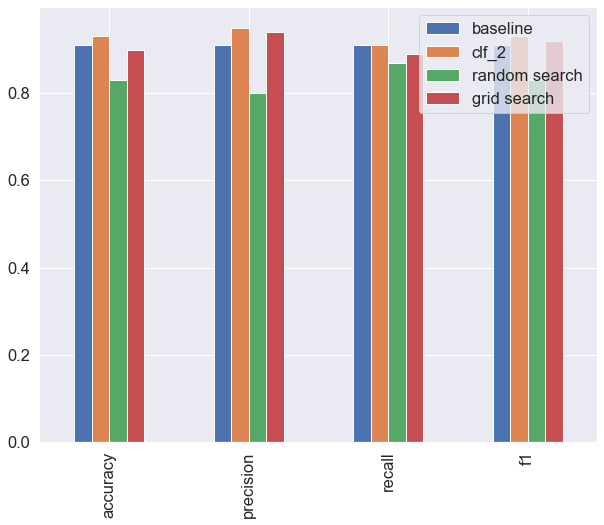

In [145]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

## Saving and loading trained machine learning models

### Saving and loading a model with pickle

In [146]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [147]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [148]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 90.16%
Precision: 0.94
Recall: 0.89
F1 score: 0.92


{'accuracy': 0.9, 'precision': 0.94, 'recall': 0.89, 'f1': 0.92}

### Saving and loading a model with joblib

In [149]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [150]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [151]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 90.16%
Precision: 0.94
Recall: 0.89
F1 score: 0.92


{'accuracy': 0.9, 'precision': 0.94, 'recall': 0.89, 'f1': 0.92}

## Creating a regression Pipeline

In [153]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(0)

# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.151921705833436

In [154]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer_

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [155]:
# Score the best model
gs_model.score(X_test, y_test)

0.34084562990018197